In [2]:
import nltk

# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('wordnet')

In [3]:
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB

import string

C:\Users\HRUSHIKESH\AppData\Local\Temp\ipykernel_162516\671803593.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# toys = pd.read_csv("/content/drive/MyDrive/Dataset/toys.csv")
toys = pd.read_csv('toys.csv')

In [5]:
toys.head(10)

,Unnamed: 0,reviewText,class
0,0,the no. of stickers are less than what i expec...,0
1,1,We purchased these replacement parts anticipat...,0
2,2,"Grandchildren had fun playing . However, after...",0
3,3,I looked at a lot of these bath dolls and ende...,1
4,4,I did not find these toys in Korea. My kids lo...,1
5,5,I ordered this for my 5yr old son. He was able...,0
6,6,I got these for my cat but she is not impresse...,1
7,7,The quality for these products left much to be...,0
8,8,Save your money. Cheap product. My sons didn't...,0
9,9,I'm very happy with my purchase of the Fisher-...,1


In [6]:
toys.shape

(300000, 3)

<Axes: xlabel='count', ylabel='class'>

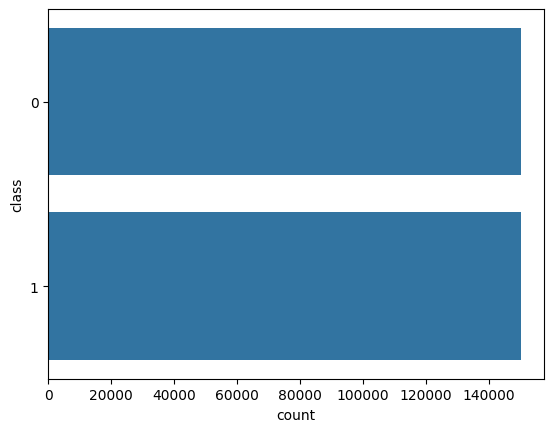

In [7]:
import seaborn as sns

sns.countplot(y=toys['class'])

In [8]:
wnl = WordNetLemmatizer()

In [9]:
def clean_text(row):

  token1 = [word.lower() for word in word_tokenize(row) if word.isalpha() or word.isdigit()]
  token2 = [words for words in token1 if words not in stopwords.words('english')]
  token3 = [wnl.lemmatize(words) for words in token2]

  return token2

In [10]:
toys_review = toys['reviewText'][0:100000]
toys_class = toys['class'][0:100000]

In [11]:
toys_review.head(10)

0    the no. of stickers are less than what i expec...
1    We purchased these replacement parts anticipat...
2    Grandchildren had fun playing . However, after...
3    I looked at a lot of these bath dolls and ende...
4    I did not find these toys in Korea. My kids lo...
5    I ordered this for my 5yr old son. He was able...
6    I got these for my cat but she is not impresse...
7    The quality for these products left much to be...
8    Save your money. Cheap product. My sons didn't...
9    I'm very happy with my purchase of the Fisher-...
Name: reviewText, dtype: object

In [1]:
# X = toys_review.apply(lambda wrd : clean_text(wrd))

In [2]:
# X.head()

In [12]:
tfidf = TfidfVectorizer(analyzer=clean_text)
X_vect = tfidf.fit_transform(toys_review)

X_vect

<100000x59882 sparse matrix of type '<class 'numpy.float64'>'
	with 2854095 stored elements in Compressed Sparse Row format>

In [14]:
X_vect

<100000x59882 sparse matrix of type '<class 'numpy.float64'>'
	with 2854095 stored elements in Compressed Sparse Row format>

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_vect,toys_class,stratify=toys_class,random_state=24,test_size=0.2)

X_train.shape,X_test.shape

((80000, 59882), (20000, 59882))

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
mnb = MultinomialNB()

In [23]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [25]:
y_pred = mnb.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(accuracy_score(y_pred,y_test))

0.8274


In [26]:
print(confusion_matrix(y_pred,y_test))

[[8384 1866]
 [1586 8164]]


In [29]:
import joblib 
joblib.dump(mnb, 'multinomial_naive_bayes.joblib')

['multinomial_naive_bayes.joblib']